# Import all packages and libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
from datetime import datetime
from pandas import Series 

# Loading data into notebook

In [2]:
train = pd.read_csv('Train_SU63ISt.csv')
test = pd.read_csv('Test_0qrQsBZ.csv')

In [3]:
train_original=train.copy() 
test_original=test.copy()

# Data Structures and Content

In [4]:
train.head(7)

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2
5,5,25-08-2012 05:00,2
6,6,25-08-2012 06:00,2


In [5]:
test.head(7)

,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00
5,18293,26-09-2014 05:00
6,18294,26-09-2014 06:00


In [6]:
train.dtypes, test.dtypes

(ID           int64
 Datetime    object
 Count        int64
 dtype: object, ID           int64
 Datetime    object
 dtype: object)

In [7]:
train.shape, test.shape

((18288, 3), (5112, 2))

# Feature Extraction

As datatype for Datetime is object, so change that into datetime format

In [8]:
train['Datetime'] = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
test['Datetime'] = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M')

test_original['Datetime'] = pd.to_datetime(test_original.Datetime,format='%d-%m-%Y %H:%M')
train_original['Datetime'] = pd.to_datetime(train_original.Datetime,format='%d-%m-%Y %H:%M')

In [9]:
for i in (train, test, test_original, train_original):
    i['year'] = i.Datetime.dt.year
    i['month'] = i.Datetime.dt.month
    i['day'] = i.Datetime.dt.day
    i['Hour'] = i.Datetime.dt.hour

In [10]:
train['day of week'] = train['Datetime'].dt.dayofweek
temp = train['Datetime']

In [11]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0
temp2 = train['Datetime'].apply(applyer)
train['weekend'] = temp2

,Datetime,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,2012-08-25 04:00:00,2,2012,8,25,4,5,1


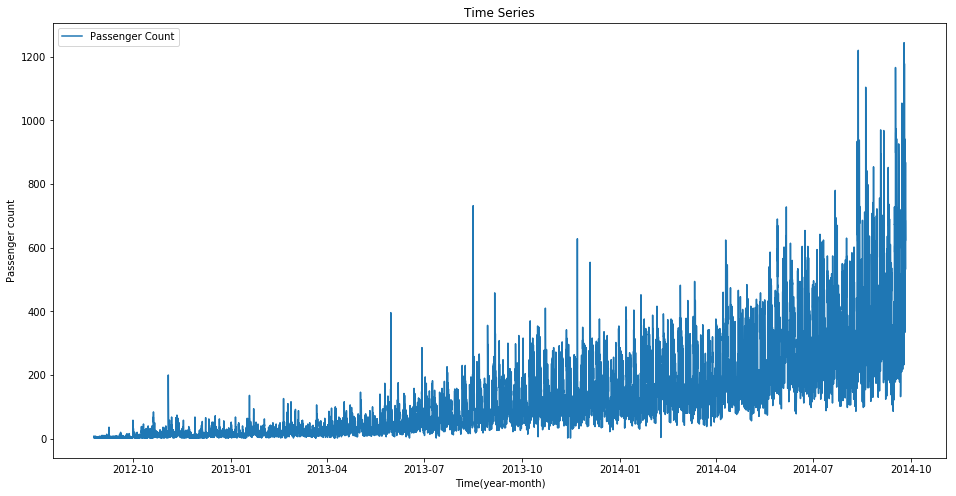

In [12]:
train.index = train['Datetime']
df = train.drop('ID',1)
ts = df['Count']
plt.figure(figsize=(16,8))
plt.plot(ts, label='Passenger Count')
plt.title('Time Series')
plt.xlabel("Time(year-month)")
plt.ylabel("Passenger count")
plt.legend(loc='best')
df.head()

# Exploratory Analysis

Hypothesis Generation

    1. Traffic will increase as the years pass by
    2. Traffic will be high from May to October
    3. Traffic on weekdays will be more
    4. Traffic during the peak hours will be high

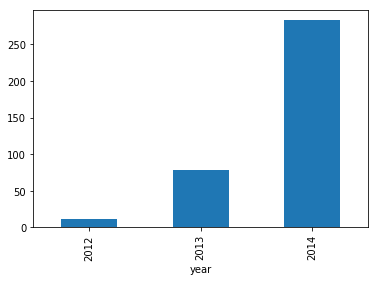

In [13]:
train.groupby('year')['Count'].mean().plot.bar()

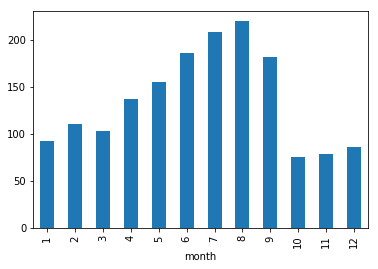

In [14]:
train.groupby('month')['Count'].mean().plot.bar()

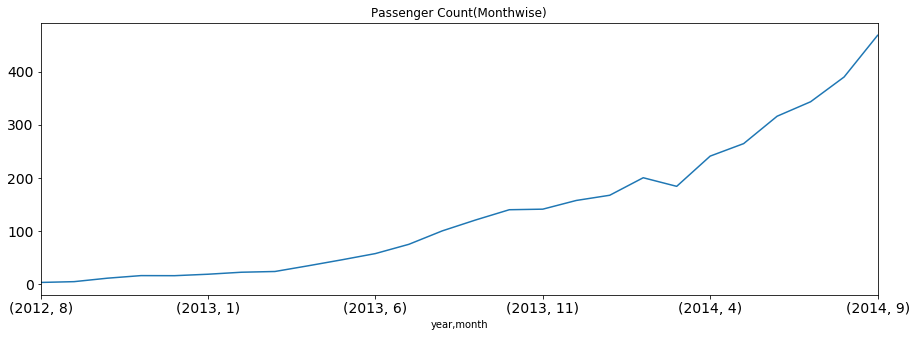

In [15]:
temp=train.groupby(['year', 'month'])['Count'].mean() 
temp.plot(figsize=(15,5), title= 'Passenger Count(Monthwise)', fontsize=14)

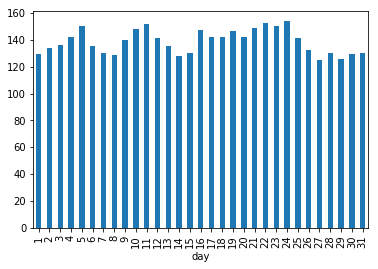

In [16]:
train.groupby('day')['Count'].mean().plot.bar()

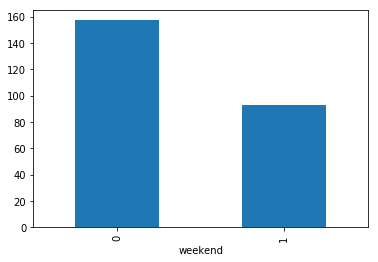

In [17]:
train.groupby('weekend')['Count'].mean().plot.bar()

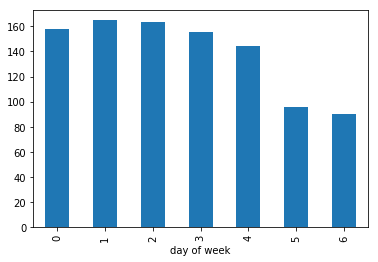

In [18]:
train.groupby('day of week')['Count'].mean().plot.bar()

In [19]:
# Hourly time series
hourly = train.resample('H').mean() 
# Converting to daily mean 
daily = train.resample('D').mean() 
# Converting to weekly mean 
weekly = train.resample('W').mean() 
# Converting to monthly mean 
monthly = train.resample('M').mean()

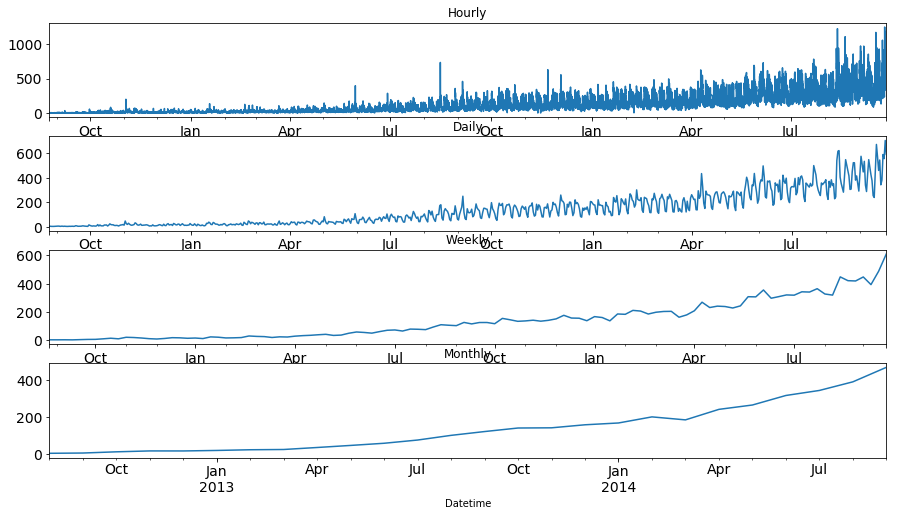

In [20]:
fig, axs = plt.subplots(4,1) 
hourly.Count.plot(figsize=(15,8), title= 'Hourly', fontsize=14, ax=axs[0])
daily.Count.plot(figsize=(15,8), title= 'Daily', fontsize=14, ax=axs[1])
weekly.Count.plot(figsize=(15,8), title= 'Weekly', fontsize=14, ax=axs[2])
monthly.Count.plot(figsize=(15,8), title= 'Monthly', fontsize=14, ax=axs[3]) 

# Spliting of Data into Train and Validation Part

In [21]:
train.head()

,ID,Datetime,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,,,
2012-08-25 00:00:00,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [22]:
train.tail()

,ID,Datetime,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,,,
2014-09-25 19:00:00,18283,2014-09-25 19:00:00,868,2014,9,25,19,3,0
2014-09-25 20:00:00,18284,2014-09-25 20:00:00,732,2014,9,25,20,3,0
2014-09-25 21:00:00,18285,2014-09-25 21:00:00,702,2014,9,25,21,3,0
2014-09-25 22:00:00,18286,2014-09-25 22:00:00,580,2014,9,25,22,3,0
2014-09-25 23:00:00,18287,2014-09-25 23:00:00,534,2014,9,25,23,3,0


    The starting date of the dataset is 25-08-2012 as we have seen in the exploration part and the end date is 25-09-2014.

In [23]:
Train=train.ix['2012-08-25':'2014-06-24']
Valid=train.ix['2014-06-25':'2014-09-25']

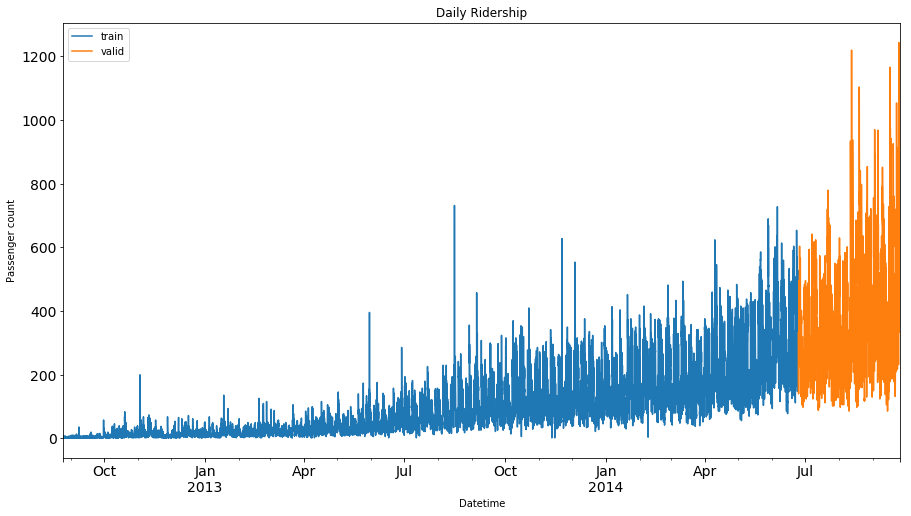

In [24]:
Train.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='train')
Valid.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='valid')
plt.xlabel("Datetime")
plt.ylabel("Passenger count")
plt.legend(loc='best')
plt.show()

# Predictive Modelling

    Holt’s Linear Trend Model

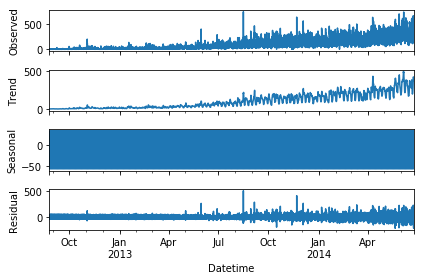

In [25]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(Train.Count).plot() 
result = sm.tsa.stattools.adfuller(train.Count) 
plt.show()

In [26]:
from statsmodels.tsa.holtwinters import Holt

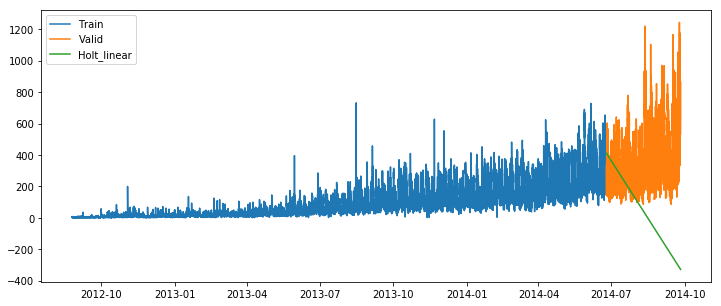

In [27]:
y_hat_avg = Valid.copy() 
fit = Holt(np.asarray(Train['Count'])).fit(smoothing_level = 0.3, smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit.forecast(len(Valid)) 
plt.figure(figsize=(12,5)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(Valid['Count'], label='Valid') 
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear') 
plt.legend(loc='best') 
plt.show()

    Here the blue part represents the train data and the orange part represents the validation data.

In [28]:
from sklearn.metrics import mean_squared_error 
from math import sqrt 

rms = sqrt(mean_squared_error(Valid.Count, y_hat_avg.Holt_linear)) 
print(rms)

475.09398202897876


In [29]:
predict = fit.forecast(len(test))

# ARIMA Model with Parameter Tuning

    Removing the trend and seasonality from the data

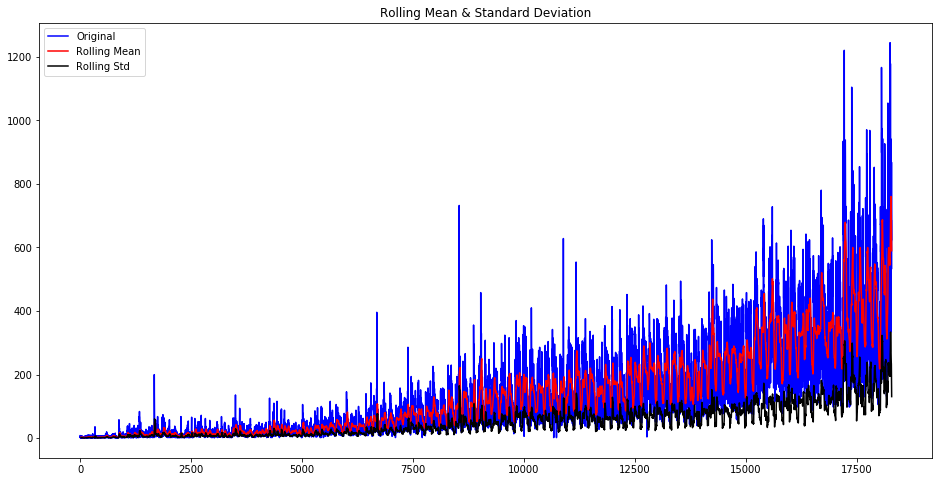

Results of Dickey-Fuller Test:
Test Statistic                    -4.456561
p-value                            0.000235
#Lags Used                        45.000000
Number of Observations Used    18242.000000
Critical Value (1%)               -3.430709
Critical Value (5%)               -2.861698
Critical Value (10%)              -2.566854
dtype: float64


In [30]:
from statsmodels.tsa.stattools import adfuller 
def test_stationarity(timeseries):
        #Determing rolling statistics
    rolmean = timeseries.rolling(24).mean() #pd.rolling_mean(timeseries, window=24) # 24 hours on each day
    rolstd = timeseries.rolling(24).std()
        #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
        #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 16,8
test_stationarity(train_original['Count'])